In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
#Importing the data
loan_df = pd.read_csv("loan.csv",index_col=0)
loan_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
#dataframe information
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Columns: 110 entries, member_id to total_il_high_credit_limit
dtypes: float64(74), int64(12), object(24)
memory usage: 33.6+ MB


In [9]:
#checking empty columns in %age
round((100*loan_df.isnull().sum())/len(loan_df.index))

member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
term                            0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 110, dtype: float64

In [10]:
#drop all the columns which contains 100% Nan Data
loan_df.dropna(axis=1,how='all',inplace=True)
round((100*loan_df.isnull().sum())/len(loan_df.index))

member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_delinq        65.0
mths_since_last_reco

In [11]:
#drop columns in which nan data is very high in percentage
loan_df.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status      

In [12]:
#check rows which contains 100% empty data
round((100*loan_df.isnull().sum(axis=1))/len(loan_df.index))

id
1077501    0.0
1077430    0.0
1077175    0.0
1076863    0.0
1075358    0.0
          ... 
92187      0.0
90665      0.0
90395      0.0
90376      0.0
87023      0.0
Length: 39717, dtype: float64

In [13]:
#check the unique target values
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [ ]:
df_credit

In [14]:
#drop Current loan status from the rows
loan_status_list = ['Fully Paid','Charged Off']
loan_df=loan_df[loan_df['loan_status'].isin(loan_status_list)]
loan_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
#convert loan status data into numerical data i.e. Fully Paid = 0 and Charged Off = 1
loan_df['loan_status']=loan_df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
loan_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [17]:
#Extract necessary columns which might impact the target columns i.e. Feature selection // provided bay case study leacture also
loan_df=loan_df.loc[:,('loan_amnt','term','int_rate','grade','emp_length',
              'home_ownership','annual_inc','issue_d','loan_status','purpose',
             'addr_state','dti')]
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti
id,,,,,,,,,,,,
1077501,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65
1077430,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00
1077175,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72
1076863,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00
1075269,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20


In [21]:
#create new column from the existing column
loan_df['year'] = loan_df['issue_d'].apply(lambda x:x.split('-')[1])
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year
id,,,,,,,,,,,,,
1077501,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11
1077430,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11
1077175,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11
1076863,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11
1075269,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11


In [26]:
#convert the data type from string to int and check the type
loan_df['year']=loan_df['year'].astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


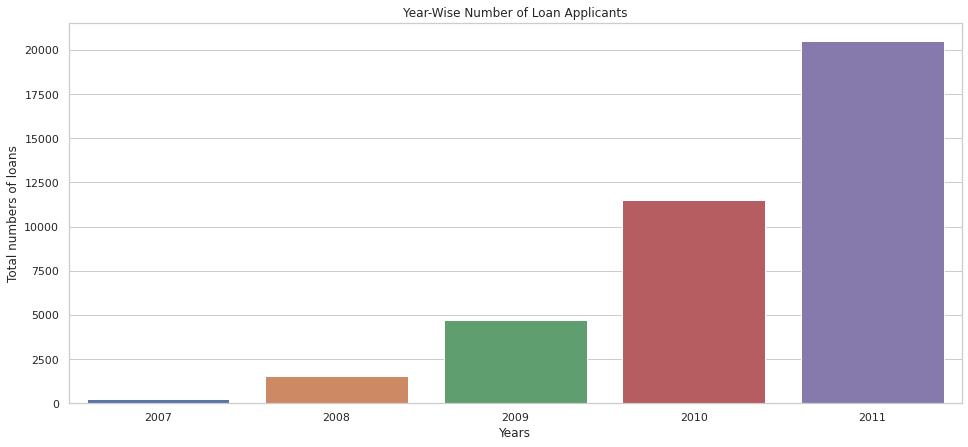

In [27]:
#draw a countplot to show the year wise increasing amount of loans in lending clubs 
plt.figure(figsize=(16,7))
sb.set(style="whitegrid")
ax=sb.countplot(x='year',data=loan_df)
years = ['2007','2008','2009','2010','2011']
xpos=np.arange(len(years))
ax.set(xlabel='Years', ylabel='Total numbers of loans',title='Year-Wise Number of Loan Applicants')
plt.xticks(xpos,years)
plt.show()

In this univariate analysis , Substantial growth between 2007-2011 in the number of loan applicants


In [31]:
#create new column from the existing column
loan_df['month'] = loan_df['issue_d'].apply(lambda x:x.split('-')[0])
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
id,,,,,,,,,,,,,,
1077501,5000,36 months,10.65,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11,Dec
1077430,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
1077175,2400,36 months,15.96,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11,Dec
1076863,10000,36 months,13.49,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11,Dec
1075269,5000,36 months,7.90,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11,Dec


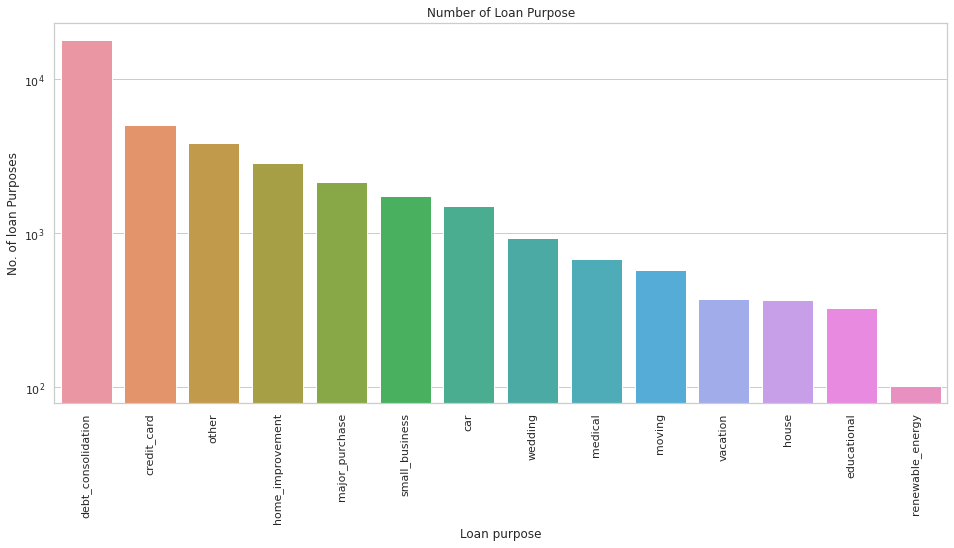

In [32]:
#Count plot to show the different loan purpose from the lending clubs
plt.figure(figsize=(16,7))
ax = sb.countplot(x='purpose',data=loan_df,order=loan_df['purpose'].value_counts().index)
ax.set(xlabel='Loan purpose', ylabel='No. of loan Purposes',title='Number of Loan Purpose')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [35]:
#create a separate dataframe of defaulters
defaulters_df=loan_df.loc[loan_df['loan_status']==1]

#calculate the percentage of loan defaulters according to grade
grade_df=pd.DataFrame(data=round((100*defaulters_df['grade'].value_counts())/loan_df['grade'].value_counts(),2))
grade_df.rename(columns={'grade':'defaulter_perc'},inplace=True)
grade_df

,defaulter_perc
A,5.99
B,12.21
C,17.19
D,21.99
E,26.85
F,32.68
G,33.78


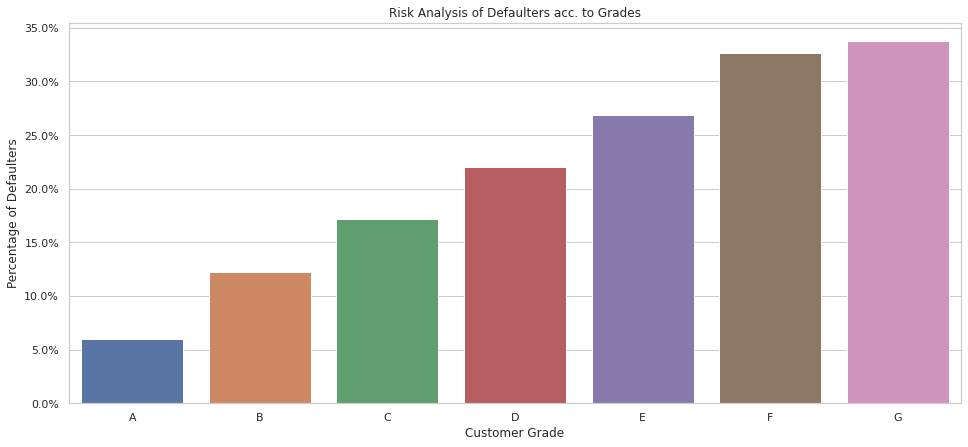

In [36]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=grade_df.index,y='defaulter_perc',data=grade_df)
ax.set(xlabel='Customer Grade', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. to Grades')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

The percentage of risk of Defaulters is the largest in the Loan Purpose – ‘small_business’ , followed by ‘renewable_energy’ , ‘educational’ and so on.

In [37]:
#calculate the percentage of loan defaulters according to Employee experience
emp_df=pd.DataFrame(data=round((100*defaulters_df['emp_length'].value_counts())/loan_df['emp_length'].value_counts(),2))
emp_df.rename(columns={'emp_length':'defaulter_perc'},inplace=True)
emp_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
emp_df

,defaulter_perc
10+ years,15.68
7 years,15.37
1 year,14.39
5 years,14.34
< 1 year,14.17
6 years,14.16
8 years,14.15
3 years,13.83
4 years,13.82
2 years,13.21


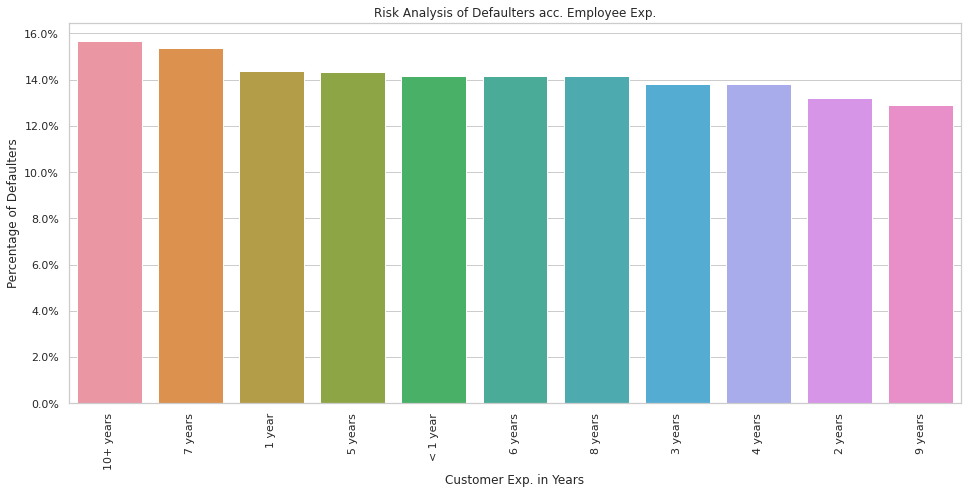

In [38]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=emp_df.index,y='defaulter_perc',data=emp_df)
ax.set(xlabel='Customer Exp. in Years', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Employee Exp.')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

In [39]:
#calculate the percentage of loan defaulters according to home onwership
home_df=pd.DataFrame(data=round((100*defaulters_df['home_ownership'].value_counts())/loan_df['home_ownership'].value_counts(),2))
home_df.rename(columns={'home_ownership':'defaulter_perc'},inplace=True)
home_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
home_df.dropna(inplace=True)
home_df

,defaulter_perc
OTHER,18.37
RENT,15.36
OWN,14.89
MORTGAGE,13.67


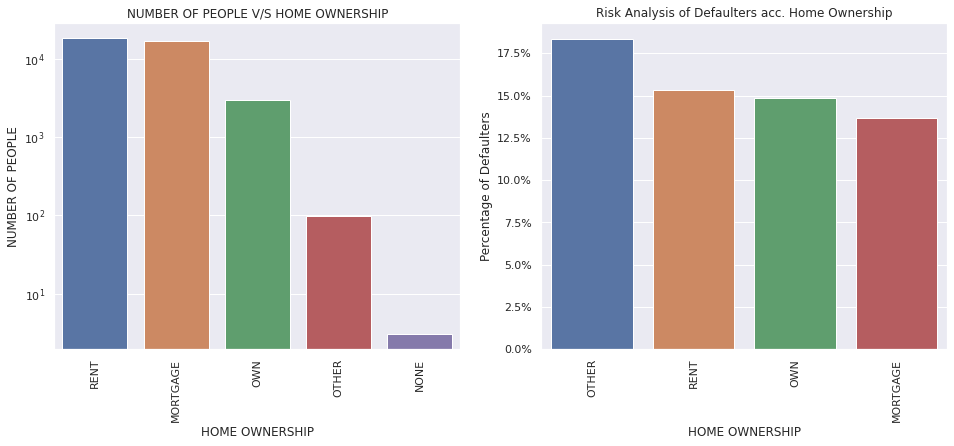

In [40]:
sb.set(style="darkgrid")
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
ax = sb.countplot(x='home_ownership',data=loan_df,order=loan_df['home_ownership'].value_counts().index)
ax.set(xlabel='HOME OWNERSHIP', ylabel='NUMBER OF PEOPLE',title='NUMBER OF PEOPLE V/S HOME OWNERSHIP')
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(1, 2, 2)
#plt.pie(home_df['defaulter_perc'], labels = home_df.index,autopct='%.2f%%')
ax=sb.barplot(x=home_df.index,y='defaulter_perc',data=home_df)
ax.set(xlabel='HOME OWNERSHIP', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Home Ownership')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

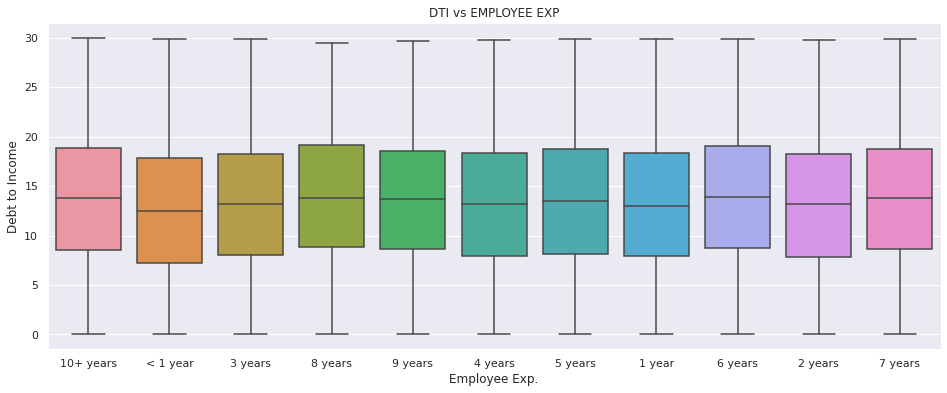

In [41]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='emp_length',y='dti',data=loan_df)
ax.set(xlabel='Employee Exp.', ylabel='Debt to Income',title='DTI vs EMPLOYEE EXP')
plt.show()

By doing bivariate analysis it has been observed that 10+ years of employee exp. Is having debt to income in maximum range apart from that rest year of employee exp. are more or less in same range.

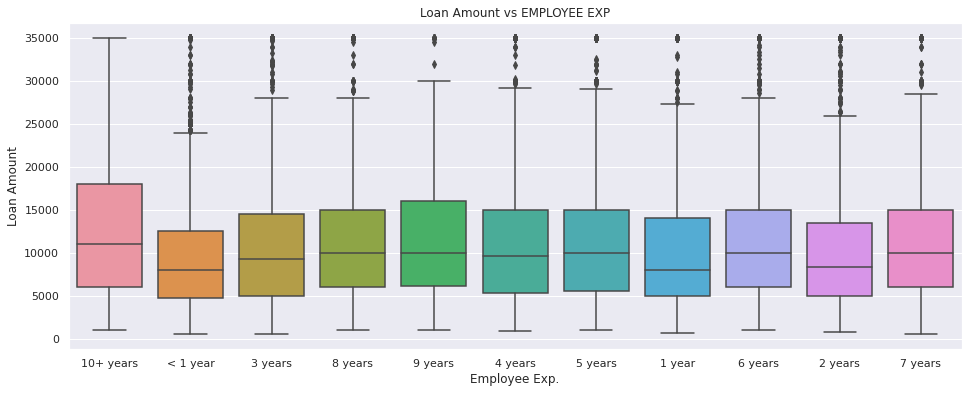

In [42]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='emp_length',y='loan_amnt',data=loan_df)
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount',title='Loan Amount vs EMPLOYEE EXP')
plt.show()

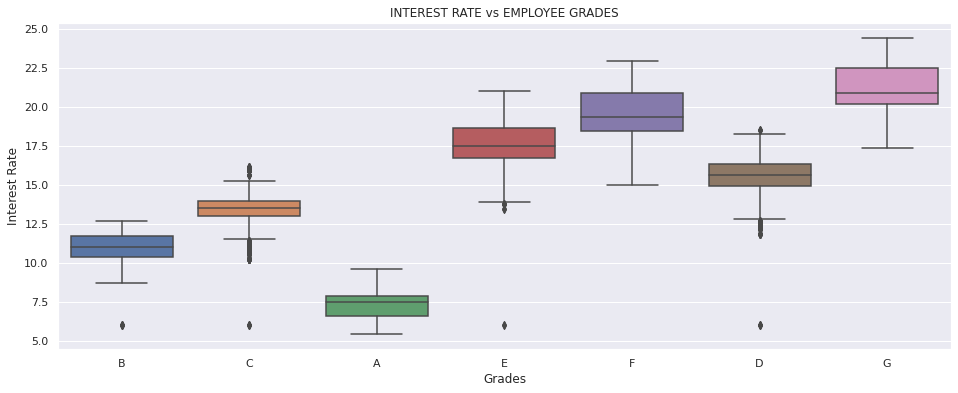

In [43]:
#By doing bivariate analysis it has been observed that the employee exp. With 10+ years is 
#taking more amount of loan and those who are less than 1 year is taken less amount of loan.

plt.figure(figsize=(16,6))
ax=sb.boxplot(x='grade',y='int_rate',data=loan_df,)
ax.set(xlabel='Grades', ylabel='Interest Rate',title='INTEREST RATE vs EMPLOYEE GRADES')
plt.show()

In [44]:
#calculate the percentage of loan defaulters according to term
term_df=pd.DataFrame(data=round((100*defaulters_df['term'].value_counts())/loan_df['term'].value_counts(),2))
term_df.rename(columns={'term':'defaulter_perc'},inplace=True)
term_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
term_df

,defaulter_perc
60 months,25.31
36 months,11.09


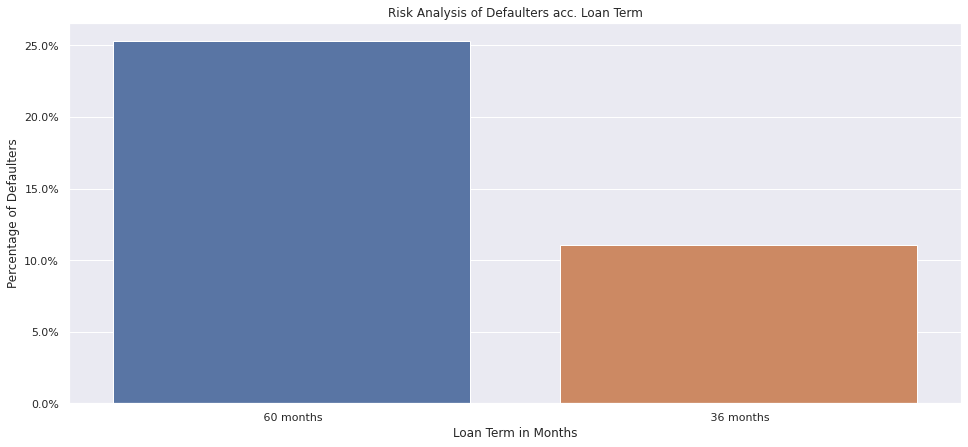

In [47]:
#Risk Analysis of Defaulters acc. Loan Term

import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=term_df.index,y='defaulter_perc',data=term_df)
ax.set(xlabel='Loan Term in Months', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Loan Term')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()